In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df= pd.read_csv("AQI_Dataset.csv")
df.drop('Unnamed: 0', axis=1, inplace= True)
df.tail()

,T,TM,tm,H,PP,VV,V,VM,PM25
3690,30.5,34.0,28.0,92,0.00,3.7,6.9,16.5,51
3691,30.9,35.0,27.6,91,0.00,3.4,6.5,16.5,56
3692,30.0,34.0,27.1,90,4.06,3.4,9.6,22.2,29
3693,30.1,35.0,28.0,90,0.00,3.2,11.1,22.2,13
3694,29.6,33.0,28.0,93,0.00,3.2,12.2,24.1,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       3695 non-null   float64
 1   TM      3695 non-null   float64
 2   tm      3695 non-null   float64
 3   H       3695 non-null   int64  
 4   PP      3695 non-null   float64
 5   VV      3695 non-null   float64
 6   V       3695 non-null   float64
 7   VM      3695 non-null   float64
 8   PM25    3695 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 259.9 KB


In [4]:
df.shape

(3695, 9)

In [5]:
df.isnull().sum()

T       0
TM      0
tm      0
H       0
PP      0
VV      0
V       0
VM      0
PM25    0
dtype: int64

In [6]:
df.describe()

,T,TM,tm,H,PP,VV,V,VM,PM25
count,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000
mean,26.446820,31.906414,21.212882,65.758593,2.725502,3.743464,8.648633,17.646847,128.872260
std,4.931379,4.892202,5.355058,17.044757,15.450113,1.703215,4.463831,7.962237,69.881704
min,8.000000,10.000000,3.000000,12.000000,0.000000,0.200000,0.200000,1.900000,2.000000
25%,23.600000,29.000000,18.100000,54.000000,0.000000,2.650000,5.200000,13.000000,77.000000
50%,27.500000,32.000000,21.800000,68.000000,0.000000,3.200000,8.300000,18.300000,119.000000
75%,29.800000,35.000000,25.400000,79.000000,0.000000,4.300000,11.100000,22.200000,165.000000
max,38.800000,47.600000,33.300000,99.000000,374.900000,8.900000,27.000000,81.300000,637.000000


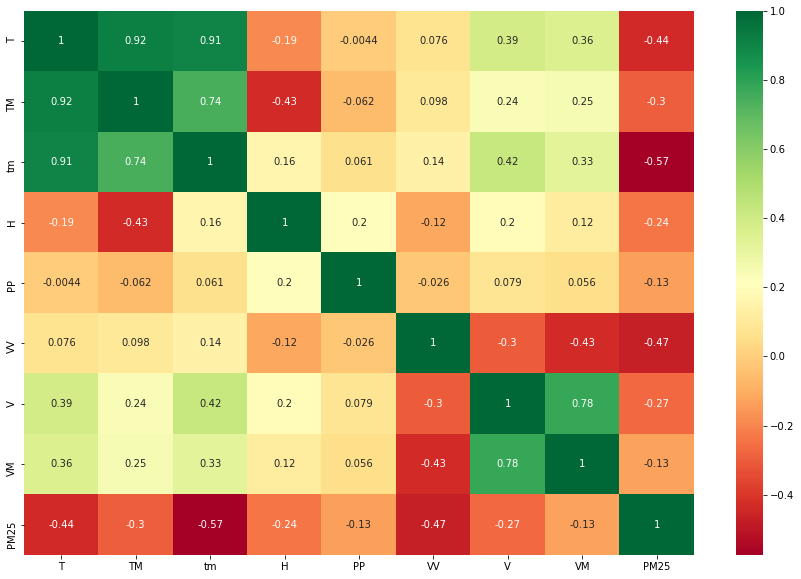

In [7]:
corr_mat = df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(15,10))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
df.corr().round(2)

,T,TM,tm,H,PP,VV,V,VM,PM25
T,1.00,0.92,0.91,-0.19,-0.00,0.08,0.39,0.36,-0.44
TM,0.92,1.00,0.74,-0.43,-0.06,0.10,0.24,0.25,-0.30
tm,0.91,0.74,1.00,0.16,0.06,0.14,0.42,0.33,-0.57
H,-0.19,-0.43,0.16,1.00,0.20,-0.12,0.20,0.12,-0.24
PP,-0.00,-0.06,0.06,0.20,1.00,-0.03,0.08,0.06,-0.13
VV,0.08,0.10,0.14,-0.12,-0.03,1.00,-0.30,-0.43,-0.47
V,0.39,0.24,0.42,0.20,0.08,-0.30,1.00,0.78,-0.27
VM,0.36,0.25,0.33,0.12,0.06,-0.43,0.78,1.00,-0.13
PM25,-0.44,-0.30,-0.57,-0.24,-0.13,-0.47,-0.27,-0.13,1.00


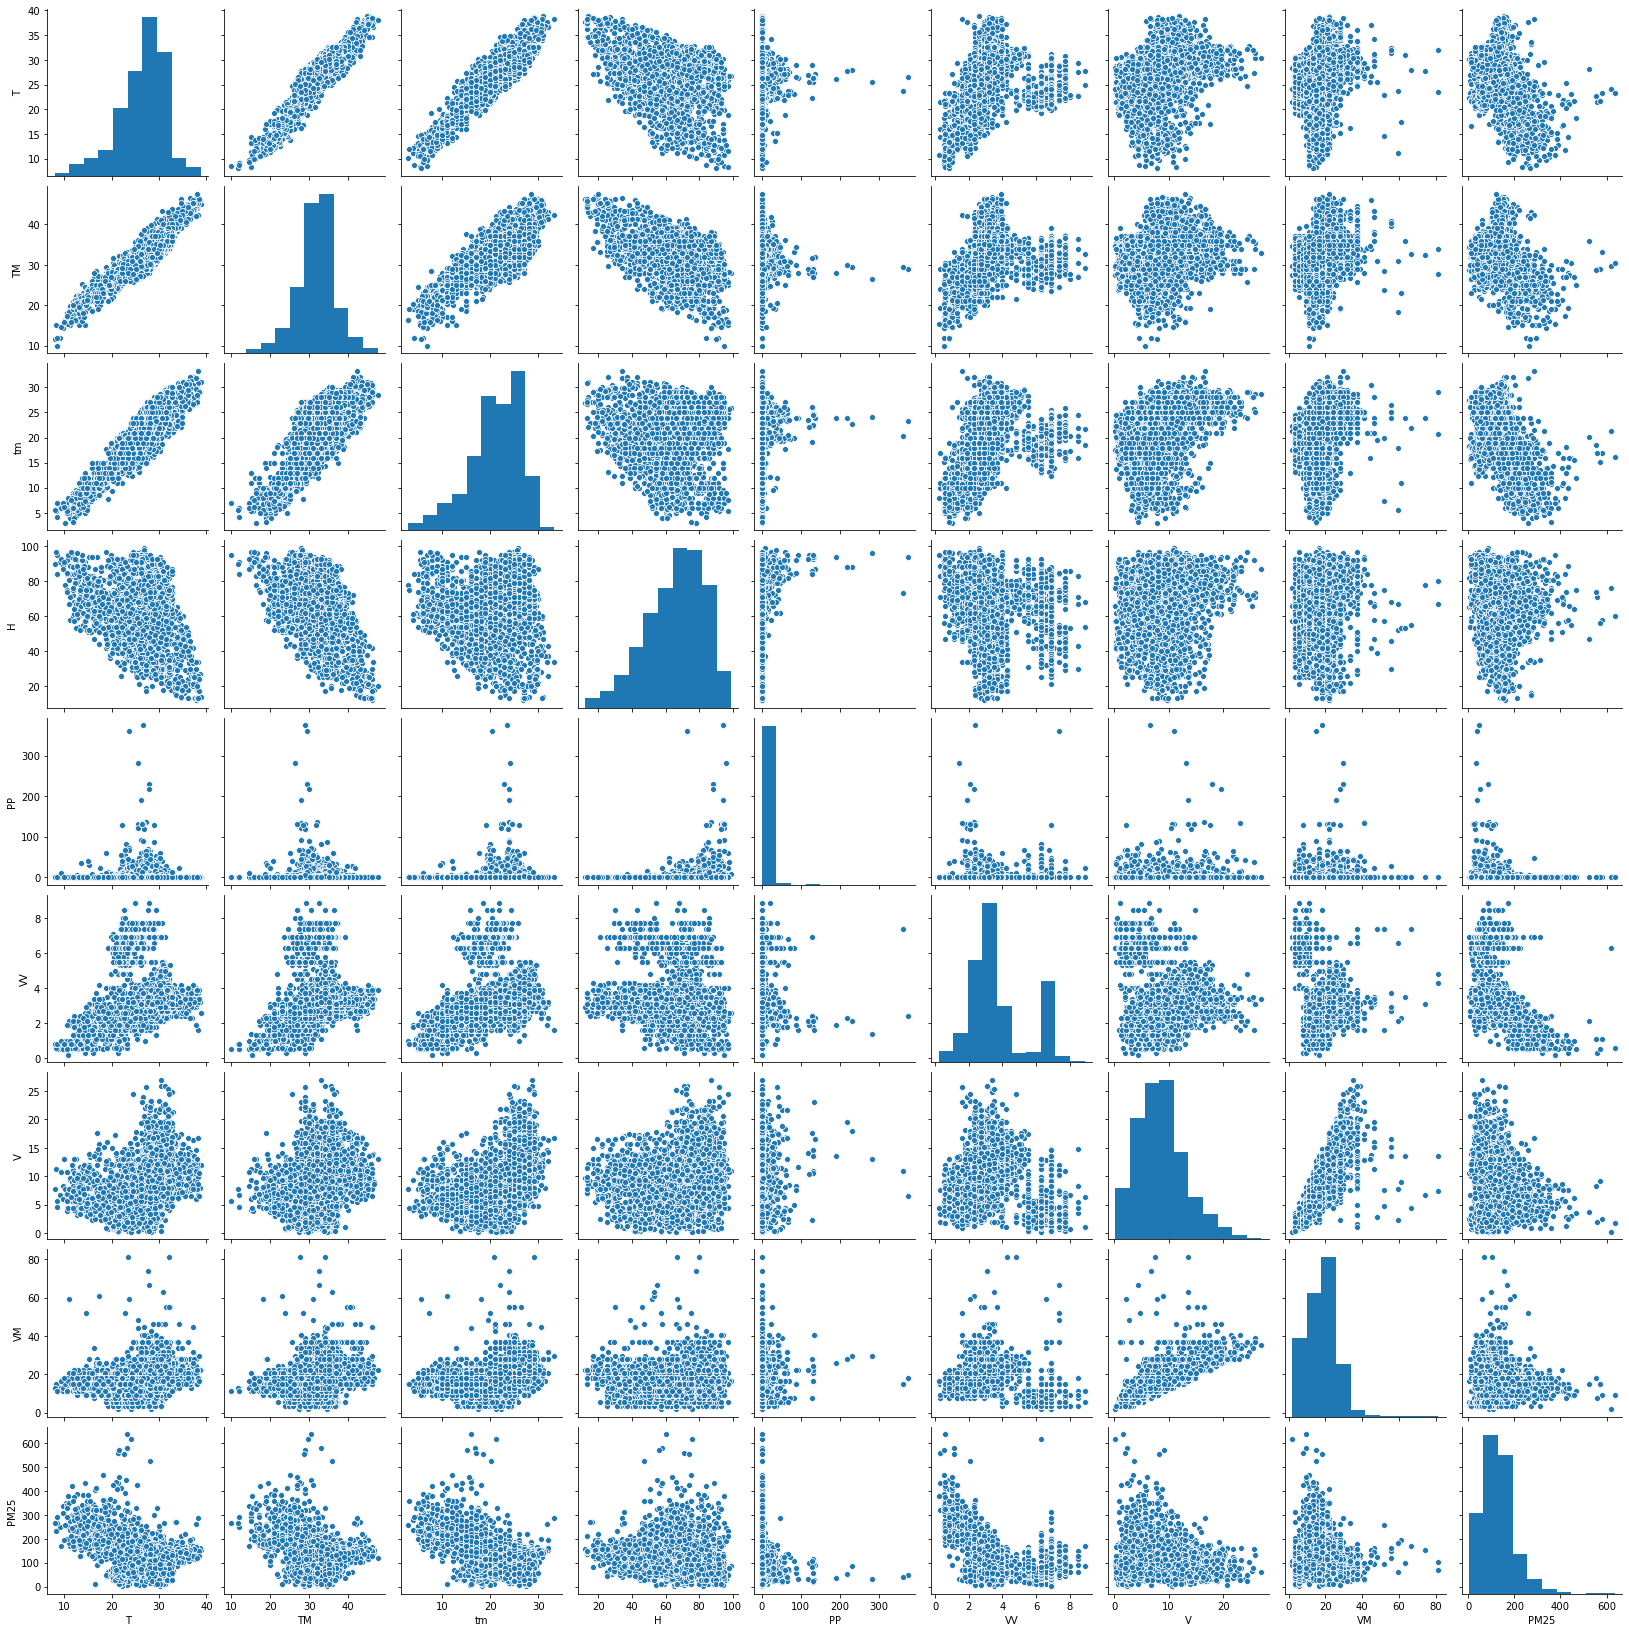

In [9]:
sns.pairplot(df)

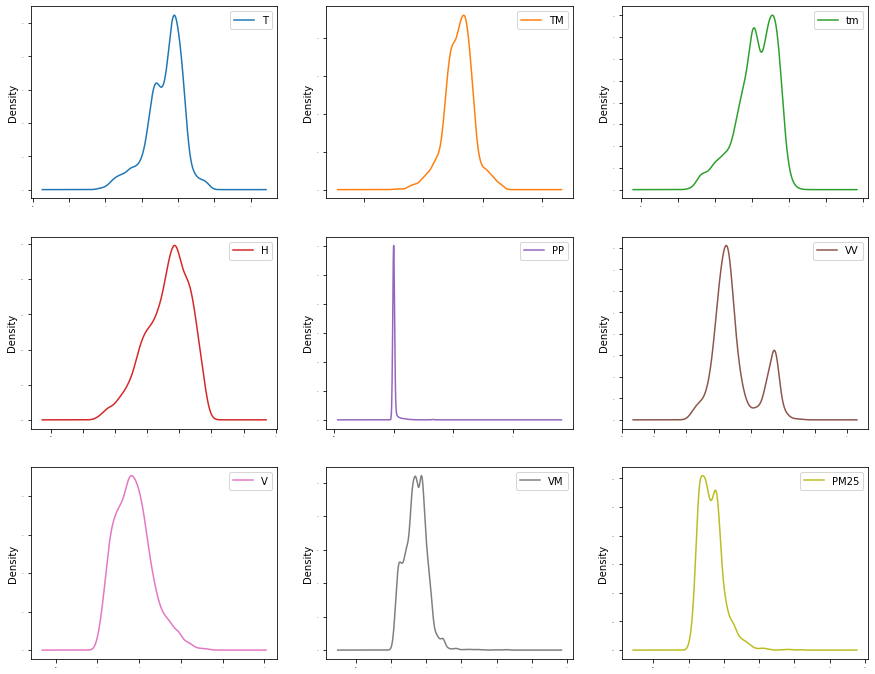

In [10]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

In [11]:
X= df.drop('PM25', axis=1)
y= df['PM25']

# Model 1 using Linear Regression

In [12]:
trainingSet, testingSet= train_test_split(df, test_size= 0.2, random_state=50)

In [13]:
model_1 = smf.ols(formula = "PM25 ~ tm + H + V + VV", data = trainingSet)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM25   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     885.3
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:11:05   Log-Likelihood:                -15595.
No. Observations:                2956   AIC:                         3.120e+04
Df Residuals:                    2951   BIC:                         3.123e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    391.9277      4.959     79.036      0.0

In [14]:
pred_1= result_1.predict(testingSet[['tm', 'H', 'V', 'VV']])

In [15]:
RMSE_1= np.sqrt(mean_squared_error(testingSet.PM25, pred_1))
print("RMSE : ", RMSE_1)

RMSE :  43.45519157511534


In [16]:
#import pickle

In [17]:
# open a file, where you ant to store the data
#file = open('AQI_LR_model.pkl', 'wb')

# dump information to that file
#pickle.dump(model_1, file)

# Model 2 using Random Forest

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 50)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
model_2= RandomForestRegressor()
model_2= model_2.fit(X_train, y_train)
model_2

RandomForestRegressor()

In [19]:
pred_2= model_2.predict(X_test)

In [20]:
print("R2 on training data : ",model_2.score(X_train, y_train))
print("R2 on testing data : ",model_2.score(X_test, y_test))
print('RMSE on testing data : ', np.sqrt(mean_squared_error(y_test, pred_2)))

R2 on training data :  0.961152519423322
R2 on testing data :  0.8037908142101974
RMSE on testing data :  30.410070978456293


In [21]:
from sklearn.model_selection import cross_val_score
CV_2 =cross_val_score(model_2 ,X, y, cv=5)
CV_2.mean()

0.5622085444617768

#### Hyper parameter tuning

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [24]:
#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [25]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 10, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [26]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 11,
 'bootstrap': True}

In [27]:
# Manually provide the best parameters to model for training
model_22 = RandomForestRegressor(**{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 11,
 'bootstrap': True})

In [33]:
model_22=model_22.fit(X_train, y_train)

In [34]:
pred_22= model_22.predict(X_test)

In [35]:
print('R2 on train data: ', model_22.score(X_train, y_train))
print('R2 on test data: ', model_22.score(X_test, y_test))
print('RMSE on test data : ', np.sqrt(mean_squared_error(y_test, pred_22)))

R2 on train data:  0.8601718926112852
R2 on test data:  0.8053505121287493
RMSE on test data :  30.288962583570726


In [36]:
import pickle

In [38]:
# open a file, where you ant to store the data
file = open('AQI_RFR_model.pkl', 'wb')

# dump information to that file
pickle.dump(model_22, file)